In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
sales = pd.read_csv("SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


### 1. Compare Sales by region for 2016 with 2015 using bar chart

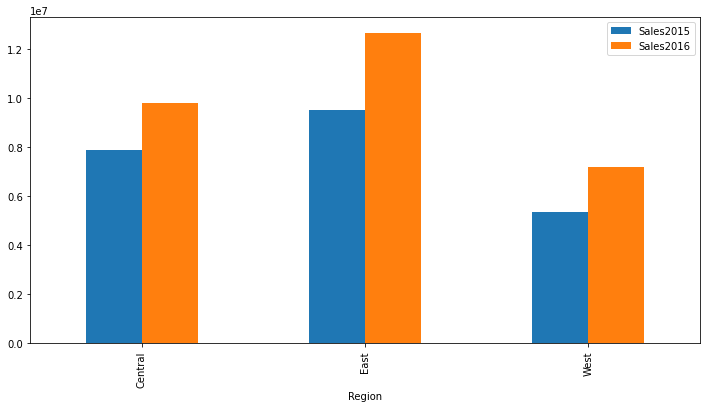

In [5]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)
sales1 = sales[['Sales2015','Sales2016','Region']].groupby(['Region']).agg('sum')
sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E786DE1C8>],
      dtype=object)

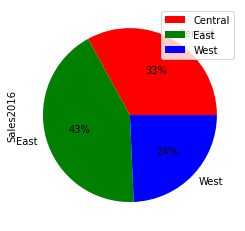

In [15]:
sales2 = sales[['Region','Sales2016']].groupby('Region').agg('sum')

sales2.plot(kind='pie', 
            labels=['Central','East','West'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

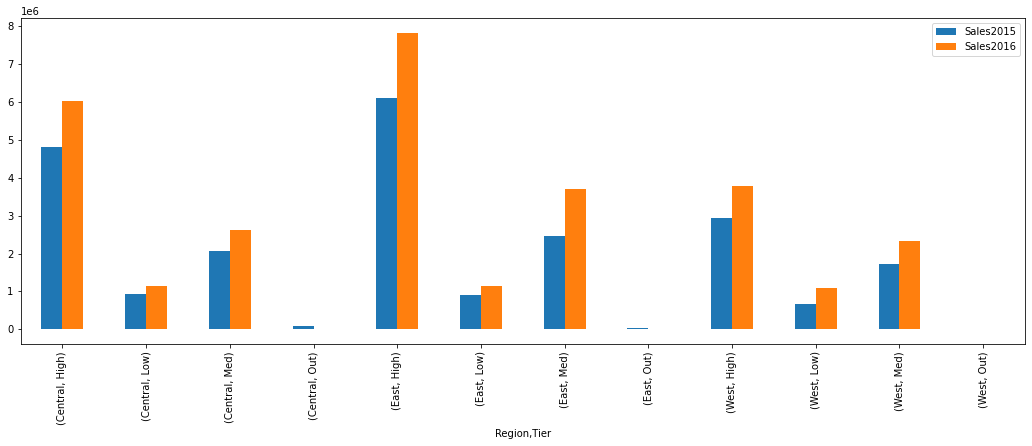

In [16]:
sales3 = sales[['Region','Tier','Sales2015','Sales2016']].groupby(['Region','Tier']).aggregate({'Sales2015':'sum','Sales2016':'sum'})

sales3graph=sales3.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

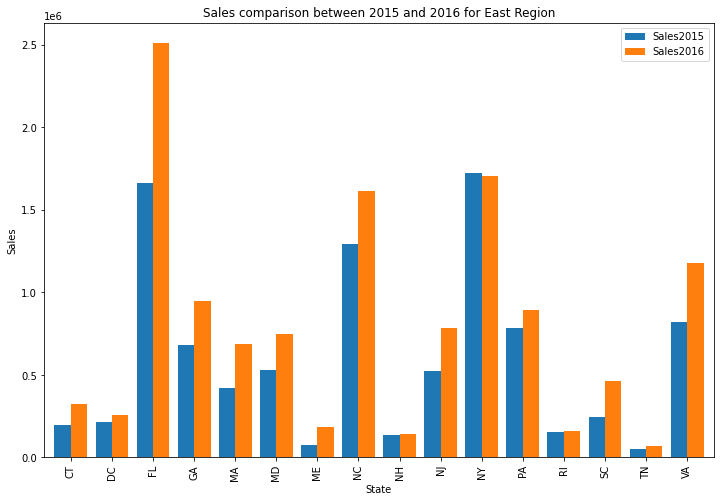

In [23]:
s=sales.loc[sales.Region=='East']
sales4=s[['State','Sales2015','Sales2016']].groupby(['State']).aggregate({'Sales2015':'sum','Sales2016':'sum'})
sales4.plot(kind="bar",figsize=(12,8),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.show()

### In East region, NY registered a decline in sales in 2016

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

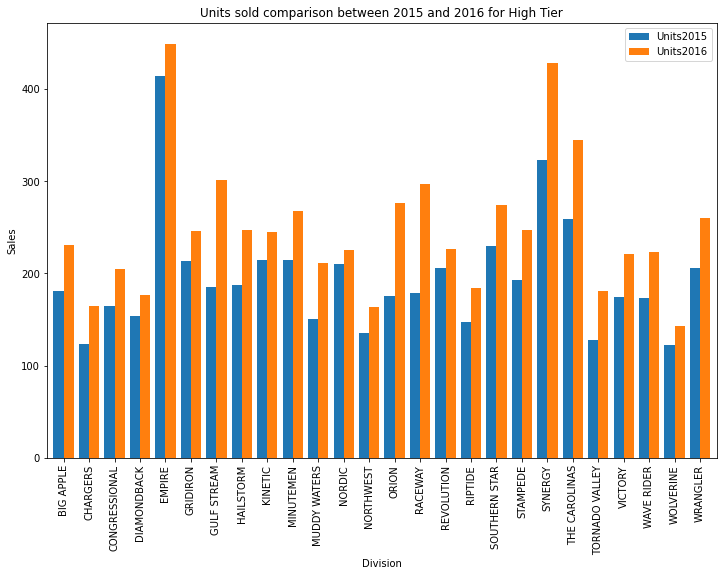

In [26]:
s1=sales.loc[sales.Tier=='High']
sales5=s1[['Division','Units2015','Units2016']].groupby(['Division']).aggregate({'Units2015':'sum','Units2016':'sum'})
sales5.plot(kind="bar",figsize=(12,8),width=0.8)
plt.ylabel("Sales")
plt.title("Units sold comparison between 2015 and 2016 for High Tier")
plt.show()

### No division saw a decline in number of units sold in 2016 compared to 2015

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [27]:
sales['Qtr'] = np.where((sales.Month == "Jan") | (sales.Month == "Feb")|(sales.Month == "Mar"),'Q1',
                        (np.where((sales.Month == "Apr")|(sales.Month == "May")|(sales.Month == "Jun"),'Q2',
                                  (np.where((sales.Month == "Jul")|(sales.Month == "Aug")|(sales.Month == "Sep"),'Q3','Q4')))))

### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


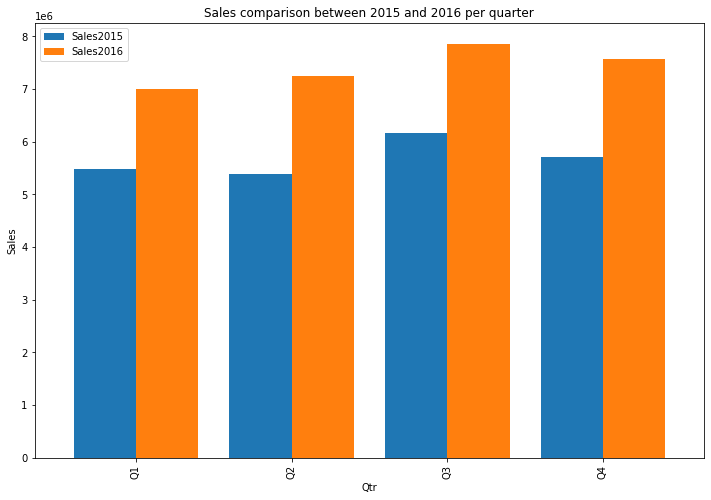

In [28]:
sales7 = sales[['Sales2015','Sales2016','Qtr']].groupby(['Qtr']).agg('sum')
sales7.plot(kind="bar",figsize=(12,8),width=0.8)
plt.ylabel("Sales")
plt.title("Sales comparison between 2015 and 2016 per quarter")
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [38]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8[['Sales2016','Qtr','Tier']].groupby(['Qtr','Tier']).aggregate('sum')
sales8 = sales8.round(decimals=1)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867718.6,4130952.6,4872559.2,4740002.0
Low,Sales2016,948832.8,890594.8,795177.7,742659.4
Med,Sales2016,2181401.9,2215813.9,2197057.6,2085206.8


C:\Users\TanujKhera\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\TanujKhera\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\TanujKhera\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\TanujKhera\Anaconda3\lib\site-packages\pa

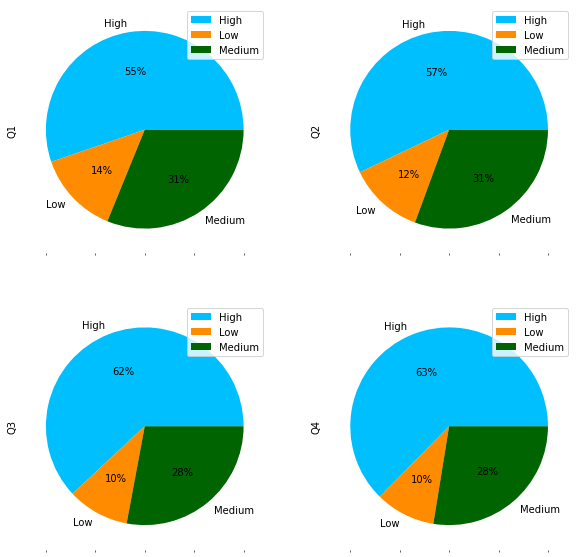

In [39]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()